## Multi-Qubit Gates <a name="multi_gates"/>

### Mathematical Preliminaries

The space of a quantum computer grows exponentially with the number of qubits. For $n$ qubits the complex vector space has dimension $d=2^n$. To describe states of a multi-qubit system, the tensor product is used to "glue together" operators and basis vectors.

Let's start by considering a 2-qubit system. Given two operators $A$ and $B$ that each act on one qubit, the joint operator $A \otimes B$ acting on two qubits is

$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$

where $A_{jk}$ and $B_{lm}$ are the matrix elements of $A$ and $B$, respectively.

Analogously, the basis vectors for the 2-qubit system are formed using the tensor product of basis vectors for a single qubit:
$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}.$$

Note we've introduced a shorthand for the tensor product of basis vectors, wherein $\left|0\right\rangle \otimes \left|0\right\rangle$ is written as $\left|00\right\rangle$. The state of an $n$-qubit system can be described using the $n$-fold tensor product of single-qubit basis vectors. Notice that the basis vectors for a 2-qubit system are 4-dimensional; in general, the basis vectors of an $n$-qubit system are $2^{n}$-dimensional, as noted earlier.

### Basis vector ordering in Qiskit

Within the physics community, the qubits of a multi-qubit systems are typically ordered with the first qubit on the left-most side of the tensor product and the last qubit on the right-most side. For instance, if the first qubit is in state $\left|0\right\rangle$ and second is in state $\left|1\right\rangle$, their joint state would be $\left|01\right\rangle$. Qiskit uses a slightly different ordering of the qubits, in which the qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right (little-endian). This is similar to bitstring representation on classical computers, and enables easy conversion from bitstrings to integers after measurements are performed. For the example just given, the joint state would be represented as $\left|10\right\rangle$. Importantly, *this change in the representation of multi-qubit states affects the way multi-qubit gates are represented in Qiskit*, as discussed below.

The representation used in Qiskit enumerates the basis vectors in increasing order of the integers they represent. For instance, the basis vectors for a 2-qubit system would be ordered as $\left|00\right\rangle$, $\left|01\right\rangle$, $\left|10\right\rangle$, and $\left|11\right\rangle$. Thinking of the basis vectors as bit strings, they encode the integers 0,1,2 and 3, respectively.


### Controlled operations on qubits

A common multi-qubit gate involves the application of a gate to one qubit, conditioned on the state of another qubit. For instance, we might want to flip the state of the second qubit when the first qubit is in $\left|0\right\rangle$. Such gates are known as _controlled gates_. The standard multi-qubit gates consist of two-qubit gates and three-qubit gates. The two-qubit gates are:
- controlled Pauli gates
- controlled Hadamard gate
- controlled rotation gates
- controlled phase gate
- controlled u3 gate
- swap gate

The three-qubit gates are: 
- Toffoli gate 
- Fredkin gate

## Two-qubit gates <a name="two_gates"/>

Most of the two-qubit gates are of the controlled type (the SWAP gate being the exception). In general, a controlled two-qubit gate $C_{U}$ acts to apply the single-qubit unitary $U$ to the second qubit when the state of the first qubit is in $\left|1\right\rangle$. Suppose $U$ has a matrix representation

$$U = \begin{pmatrix} u_{00} & u_{01} \\ u_{10} & u_{11}\end{pmatrix}.$$

We can work out the action of $C_{U}$ as follows. Recall that the basis vectors for a two-qubit system are ordered as $\left|00\right\rangle, \left|01\right\rangle, \left|10\right\rangle, \left|11\right\rangle$. Suppose the **control qubit** is **qubit 0** (which, according to Qiskit's convention, is one the _right-hand_ side of the tensor product). If the control qubit is in $\left|1\right\rangle$, $U$ should be applied to the **target** (qubit 1, on the _left-hand_ side of the tensor product). Therefore, under the action of $C_{U}$, the basis vectors are transformed according to

$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
\end{align*}.$$

In matrix form, the action of $C_{U}$ is

$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & u_{00} & 0 & u_{01} \\
	0 & 0 & 1 & 0 \\
	0 & u_{10} &0 & u_{11}
		\end{pmatrix}.
\end{equation}$$

To work out these matrix elements, let

$$C_{(jk), (lm)} = \left(\underset{\text{qubit}~1}{\left\langle j \right|} \otimes \underset{\text{qubit}~0}{\left\langle k \right|}\right) C_{U} \left(\underset{\text{qubit}~1}{\left| l \right\rangle} \otimes \underset{\text{qubit}~0}{\left| m \right\rangle}\right),$$

compute the action of $C_{U}$ (given above), and compute the inner products.

As shown in the examples below, this operation is implemented in Qiskit as `cU(q[0],q[1])`.


If **qubit 1 is the control and qubit 0 is the target**, then the basis vectors are transformed according to
$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|1\right\rangle}\\
\end{align*},$$


which implies the matrix form of $C_{U}$ is
$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0  & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & u_{00} & u_{01} \\
	0 & 0 & u_{10} & u_{11}
		\end{pmatrix}.
\end{equation}$$

In [8]:
# Useful additional packages 
import matplotlib.pyplot as plt
import numpy as np
from math import pi


from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

backend_unitary = BasicAer.get_backend('unitary_simulator')
backend_qasm = BasicAer.get_backend('qasm_simulator')
backend_statevector = BasicAer.get_backend('statevector_simulator')

In [62]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

In [63]:
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw()

q388_0: ──■──
        ┌─┴─┐
q388_1: ┤ X ├
        └───┘

In [64]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

In [65]:
qc = QuantumCircuit(q,c)
qc.cx(q[0],q[1])
qc.measure(q,c)
qc.draw()

┌─┐   
q388_0: ──■──┤M├───
        ┌─┴─┐└╥┘┌─┐
q388_1: ┤ X ├─╫─┤M├
        └───┘ ║ └╥┘
  c0: 2/══════╩══╩═
              0  1

{'00': 1024}


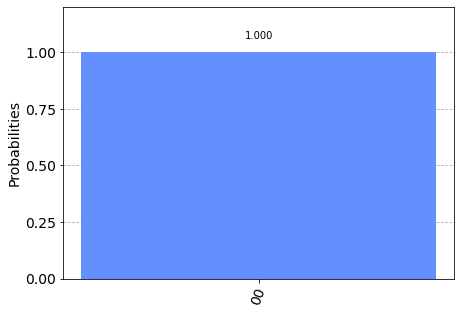

In [66]:
job = backend_qasm.run(transpile(qc, backend_qasm))
counts=job.result().get_counts()
print(counts)
plot_histogram(counts)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


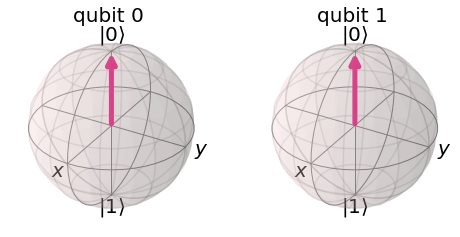

In [67]:
job = backend_statevector.run(transpile(qc, backend_statevector))
sv=job.result().get_statevector()
print(sv)
plot_bloch_multivector(sv)

In [69]:
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.cx(q[0],q[1])
qc.draw()

┌───┐     
q388_0: ┤ H ├──■──
        └───┘┌─┴─┐
q388_1: ─────┤ X ├
             └───┘
  c0: 2/══════════

In [70]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]])

In [71]:
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.cx(q[0],q[1])
qc.measure_all()
qc.draw()

┌───┐      ░ ┌─┐   
q388_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
q388_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
  c0: 2/══════════════╬══╬═
                      ║  ║ 
meas: 2/══════════════╩══╩═
                      0  1

{'11 00': 519, '00 00': 505}


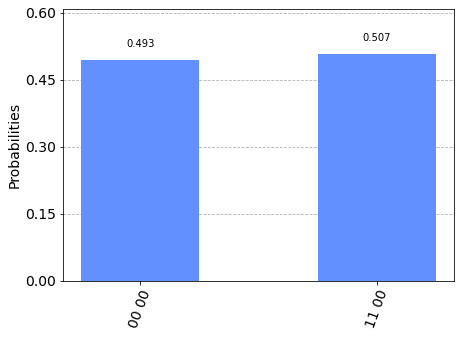

In [72]:
job = backend_qasm.run(transpile(qc, backend_qasm))
counts=job.result().get_counts()
print(counts)
plot_histogram(counts)

#### Run the cell below for multiple times too see the change

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


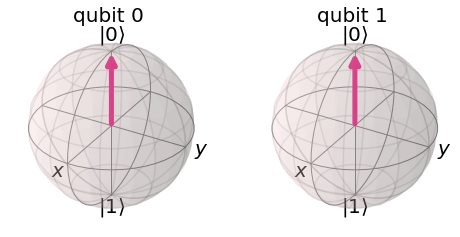

In [73]:
job = backend_statevector.run(transpile(qc, backend_statevector))
sv=job.result().get_statevector()
print(sv)
plot_bloch_multivector(sv, figsize=(15,6))

#### Controlled $Y$ gate

Apply the $Y$ gate to the target qubit if the control qubit is the MSB

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & i & 0
\end{pmatrix},
$$

or when the LSB is the control

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & 1 & 0\\
0 & i & 0 & 0
\end{pmatrix}.
$$

In [37]:
qc = QuantumCircuit(q)
qc.cy(q[0],q[1])
qc.draw()

q0_0: ──■──
      ┌─┴─┐
q0_1: ┤ Y ├
      └───┘

In [39]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

#### Controlled $Z$ (or, controlled Phase-Flip) gate

Similarly, the controlled Z gate flips the phase of the target qubit if the control qubit is $\left|1\right\rangle$. The matrix looks the same regardless of whether the MSB or LSB is the control qubit:

$$
C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
$$


In [40]:
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw()

q0_0: ─■─
       │ 
q0_1: ─■─

In [41]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

### Controlled Hadamard gate

Apply $H$ gate to the target qubit if the control qubit is $\left|1\right\rangle$. Below is the case where the control is the LSB qubit.

$$
C_H = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
0 & 0 & 1 & 0\\
0 & \frac{1}{\sqrt{2}}  & 0& -\frac{1}{\sqrt{2}}
\end{pmatrix}
$$

In [42]:
qc = QuantumCircuit(q)
qc.ch(q[0],q[1])
qc.draw()

q0_0: ──■──
      ┌─┴─┐
q0_1: ┤ H ├
      └───┘

In [43]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[ 1.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j,  0.707-0.j],
       [ 0.   +0.j,  0.   +0.j,  1.   -0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707+0.j]])

### Controlled rotation gates

#### Controlled rotation around Z-axis

Perform rotation around Z-axis on the target qubit if the control qubit (here LSB) is $\left|1\right\rangle$.

$$
C_{Rz}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\lambda/2} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda/2}
\end{pmatrix}
$$

In [44]:
qc = QuantumCircuit(q)
qc.crz(pi/2,q[0],q[1])
qc.draw()

q0_0: ─────■─────
      ┌────┴────┐
q0_1: ┤ Rz(π/2) ├
      └─────────┘

In [45]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

### Controlled phase rotation

Perform a phase rotation if both qubits are in the $\left|11\right\rangle$ state. The matrix looks the same regardless of whether the MSB or LSB is the control qubit.

$$
C_{p}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}
$$

In [46]:
qc = QuantumCircuit(q)
qc.cp(pi/2,q[0], q[1])
qc.draw()

q0_0: ─■───────
       │P(π/2) 
q0_1: ─■───────

In [48]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

### Controlled $u$ rotation

Perform controlled-$u$ rotation on the target qubit if the control qubit (here LSB) is $\left|1\right\rangle$. 

$$
C_{u}(\theta, \phi, \lambda) \equiv 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & 0 & -e^{-i(\phi-\lambda)/2}\sin(\theta/2)\\
0 & 0 & 1 & 0\\
0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}\cos(\theta/2)
\end{pmatrix}.
$$

In [49]:
qc = QuantumCircuit(q)
qc.cu(pi/2, pi/2, pi/2, 0, q[0], q[1])
qc.draw()

q0_0: ─────────■──────────
      ┌────────┴─────────┐
q0_1: ┤ U(π/2,π/2,π/2,0) ├
      └──────────────────┘

In [50]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   ,  0.   -0.707j],
       [ 0.   +0.j   ,  0.   +0.j   ,  1.   -0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.707j,  0.   +0.j   , -0.707+0.j   ]])

### SWAP gate

The SWAP gate exchanges the two qubits. It transforms the basis vectors as

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

which gives a matrix representation of the form

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

In [51]:
qc = QuantumCircuit(q)
qc.swap(q[0], q[1])
qc.draw()

q0_0: ─X─
       │ 
q0_1: ─X─

In [52]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

## Three-qubit gates <a name="three_gates"/>


There are two commonly-used three-qubit gates. For three qubits, the basis vectors are ordered as

$$\left|000\right\rangle, \left|001\right\rangle, \left|010\right\rangle, \left|011\right\rangle, \left|100\right\rangle, \left|101\right\rangle, \left|110\right\rangle, \left|111\right\rangle,$$

which, as bitstrings, represent the integers $0,1,2,\cdots, 7$. Again, Qiskit uses a representation in which the first qubit is on the right-most side of the tensor product and the third qubit is on the left-most side:

$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

### Toffoli gate ($ccx$ gate)

The [Toffoli gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Toffoli_(CCNOT)_gate) flips the third qubit if the first two qubits (LSB) are both $\left|1\right\rangle$:

$$\left|abc\right\rangle \rightarrow \left|bc\oplus a\right\rangle \otimes \left|b\right\rangle \otimes \left|c\right\rangle.$$

In matrix form, the Toffoli gate is
$$
C_{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}.
$$

In [53]:
q = QuantumRegister(3)

In [54]:
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw()

q339_0: ──■──
          │  
q339_1: ──■──
        ┌─┴─┐
q339_2: ┤ X ├
        └───┘

In [55]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

### Controlled swap gate (Fredkin Gate)

The [Fredkin gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Fredkin_(CSWAP)_gate), or the *controlled swap gate*, exchanges the second and third qubits if the first qubit (LSB) is $\left|1\right\rangle$:

$$ \left|abc\right\rangle \rightarrow \begin{cases} \left|bac\right\rangle~~\text{if}~c=1 \cr \left|abc\right\rangle~~\text{if}~c=0 \end{cases}.$$

In matrix form, the Fredkin gate is

$$
C_{\mathrm{SWAP}} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$

In [56]:
qc = QuantumCircuit(q)
qc.cswap(q[0], q[1], q[2])
qc.draw()

q339_0: ─■─
         │ 
q339_1: ─X─
         │ 
q339_2: ─X─

In [58]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j]])

In [59]:
# Initializing a three-qubit quantum state
import math
desired_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]


q = QuantumRegister(3)

qc = QuantumCircuit(q)

qc.initialize(desired_vector, [q[0],q[1],q[2]])
qc.draw()

┌───────────────────────────────────────────────────────────────────┐
q354_0: ┤0                                                                  ├
        │                                                                   │
q354_1: ┤1 Initialize(0.25j,0.35355,0.25+0.25j,0,0,0.35355+0.70711j,0.25,0) ├
        │                                                                   │
q354_2: ┤2                                                                  ├
        └───────────────────────────────────────────────────────────────────┘

In [60]:
backend = BasicAer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
qc_state 

array([6.93889390e-17+2.50000000e-01j, 3.53553391e-01+9.02056208e-17j,
       2.50000000e-01+2.50000000e-01j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 3.53553391e-01+7.07106781e-01j,
       2.50000000e-01-2.08166817e-17j, 0.00000000e+00+0.00000000e+00j])

[Fidelity](https://en.wikipedia.org/wiki/Fidelity_of_quantum_states) is useful to check whether two states are the same or not.
For quantum (pure) states $\left|\psi_1\right\rangle$ and $\left|\psi_2\right\rangle$, the fidelity is

$$
F\left(\left|\psi_1\right\rangle,\left|\psi_2\right\rangle\right) = \left|\left\langle\psi_1\middle|\psi_2\right\rangle\right|^2.
$$

The fidelity is equal to $1$ if and only if two states are equal.

In [74]:
state_fidelity(desired_vector,qc_state)

1.0000000000000004

### Further details:

How does the desired state get generated behind the scenes? There are multiple methods for doing this. Qiskit uses a [method proposed by Shende et al](https://arxiv.org/abs/quant-ph/0406176). Here, the idea is to assume the quantum register to have started from our desired state, and construct a circuit that takes it to the $\left|00..0\right\rangle$ state. The initialization circuit is then the reverse of such circuit.

To take an arbitrary quantum state to the zero state in the computational basis, we perform an iterative procedure that disentangles qubits from the register one-by-one. We know that any arbitrary single-qubit state $\left|\rho\right\rangle$ can be taken to the $\left|0\right\rangle$ state using a $\phi$-degree rotation about the Z axis followed by a $\theta$-degree rotation about the Y axis:

$$R_y(-\theta)R_z(-\phi)\left|\rho\right\rangle = re^{it}\left|0\right\rangle$$

Since now we are dealing with $n$ qubits instead of just 1, we must factorize the state vector to separate the Least Significant Bit (LSB):

$$\begin{align*}
 \left|\psi\right\rangle =& \alpha_{0_0}\left|00..00\right\rangle + \alpha_{0_1}\left|00..01\right\rangle + \alpha_{1_0}\left|00..10\right\rangle + \alpha_{1_1}\left|00..11\right\rangle + ... \\&+ \alpha_{(2^{n-1}-1)_0}\left|11..10\right\rangle + \alpha_{(2^{n-1}-1)_1}\left|11..11\right\rangle \\
=& \left|00..0\right\rangle (\alpha_{0_0}\left|0\right\rangle + \alpha_{0_1}\left|1\right\rangle) + \left|00..1\right\rangle (\alpha_{1_0}\left|0\right\rangle + \alpha_{1_1}\left|1\right\rangle) + ... \\&+ \left|11..1\right\rangle (\alpha_{(2^{n-1}-1)_0}(\left|0\right\rangle + \alpha_{(2^{n-1}-1)_1}\left|1\right\rangle) \\
=& \left|00..0\right\rangle\left|\rho_0\right\rangle + \left|00..1\right\rangle\left|\rho_1\right\rangle + ... + \left|11..1\right\rangle\left|\rho_{2^{n-1}-1}\right\rangle
\end{align*}$$

Now each of the single-qubit states $\left|\rho_0\right\rangle, ..., \left|\rho_{2^{n-1}-1}\right\rangle$ can be taken to $\left|0\right\rangle$ by finding appropriate $\phi$ and $\theta$ angles per the equation above. Doing this simultaneously on all states amounts to the following unitary, which disentangles the LSB:

$$U = \begin{pmatrix} 
R_{y}(-\theta_0)R_{z}(-\phi_0) & & & &\\  
& R_{y}(-\theta_1)R_{z}(-\phi_1) & & &\\
& . & & &\\
& & . & &\\
& & & & R_y(-\theta_{2^{n-1}-1})R_z(-\phi_{2^{n-1}-1})
\end{pmatrix} $$

Hence,

$$U\left|\psi\right\rangle = \begin{pmatrix} r_0e^{it_0}\\ r_1e^{it_1}\\ . \\ . \\ r_{2^{n-1}-1}e^{it_{2^{n-1}-1}} \end{pmatrix}\otimes\left|0\right\rangle$$


U can be implemented as a "quantum multiplexor" gate, since it is a block diagonal matrix. In the quantum multiplexor formalism, a block diagonal matrix of size $2^n \times 2^n$, and consisting of $2^s$ blocks, is equivalent to a multiplexor with $s$ select qubits and $n-s$ data qubits. Depending on the state of the select qubits, the corresponding blocks are applied to the data qubits. A multiplexor of this kind can be implemented after recursive decomposition to primitive gates of cx, rz and ry.